1. Подключение библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import Sequential
import warnings 
warnings.filterwarnings('ignore') 

2. Импортирование данных

In [3]:
data = "Downloads/DATASET/TRAIN"
test = "Downloads/DATASET/TEST"
classes = os.listdir(data)
number_of_classes = len(classes)
number_of_test = 12630
print(number_of_classes)

43


3. Некоторые из знаков

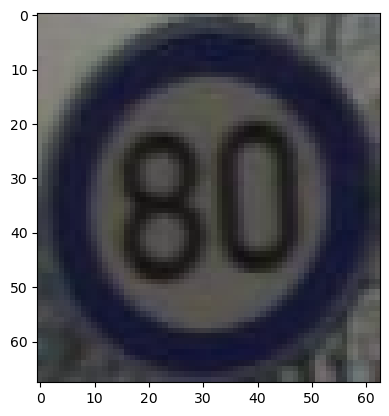

In [4]:
img1 = cv2.imread("Downloads/DATASET/TRAIN/00005/00041_00029.jpg") 
plt.imshow(img1) 
image1_height, image1_width, channels = img1.shape

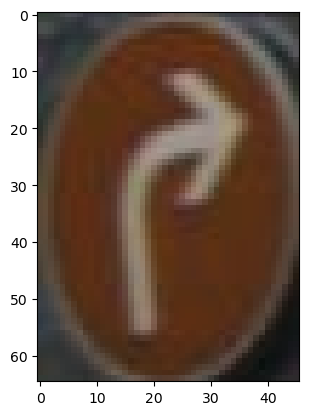

In [5]:
img2 = cv2.imread("Downloads/DATASET/TRAIN/00033/00015_00029.jpg") 
plt.imshow(img2) 
image2_height, image2_width, channels = img2.shape

In [6]:
print(image1_height,'x',image1_width,'   ',image2_height,'x',image2_width)

68 x 63     65 x 46


В датасете все изображения разных размеров, приведем их к одному - 64x64. Изображения цветные: канала 3.

In [7]:
height, width, canals = 64,64,3

Обработка данных


In [9]:
datagen_for_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range=20,horizontal_flip=True,validation_split=0.2)
train_ds = datagen_for_data.flow_from_directory(data,target_size = (height,width),batch_size = 32,subset = "training",class_mode = "categorical",
                                                shuffle = True)
val_ds = datagen_for_data.flow_from_directory(data,target_size = (height,width),batch_size = 32,subset = "validation",class_mode = "categorical",
                                              shuffle = True)
datagen_for_test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_ds = datagen_for_test.flow_from_directory(test,target_size = (height,width),shuffle = False)

Found 21312 images belonging to 43 classes.
Found 5328 images belonging to 43 classes.
Found 12630 images belonging to 1 classes.


Создаем модель

In [10]:
model = Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(number_of_classes,  activation='softmax')
])

In [11]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,475 (2.76 MB)

 Trainable params: 722,475 (2.76 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Обучаем

In [13]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
666/666 ━━━━━━━━━━━━━━━━━━━━ 119s 175ms/step - accuracy: 0.2364 - loss: 2.6910 - val_accuracy: 0.4733 - val_loss: 1.8784
Epoch 2/5
666/666 ━━━━━━━━━━━━━━━━━━━━ 90s 134ms/step - accuracy: 0.7292 - loss: 0.7910 - val_accuracy: 0.6929 - val_loss: 1.2116
Epoch 3/5
666/666 ━━━━━━━━━━━━━━━━━━━━ 93s 140ms/step - accuracy: 0.8948 - loss: 0.3186 - val_accuracy: 0.7892 - val_loss: 0.8013
Epoch 4/5
666/666 ━━━━━━━━━━━━━━━━━━━━ 94s 140ms/step - accuracy: 0.9398 - loss: 0.1830 - val_accuracy: 0.7825 - val_loss: 0.9172
Epoch 5/5
666/666 ━━━━━━━━━━━━━━━━━━━━ 94s 140ms/step - accuracy: 0.9556 - loss: 0.1369 - val_accuracy: 0.8121 - val_loss: 0.8024


Оценка модели

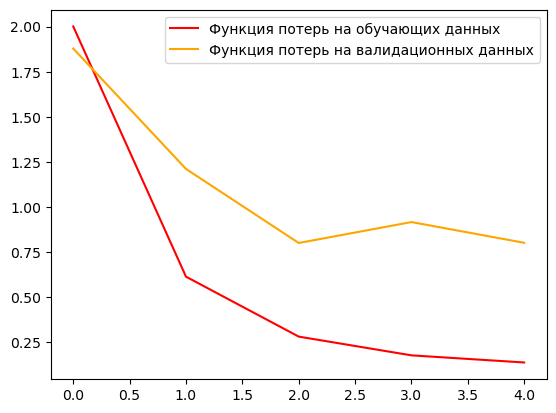

In [17]:
plt.plot(history.history['loss'], color='red') 
plt.plot(history.history['val_loss'],color='orange') 
plt.legend(['Функция потерь на обучающих данных', 'Функция потерь на валидационных данных'], loc='upper right') 

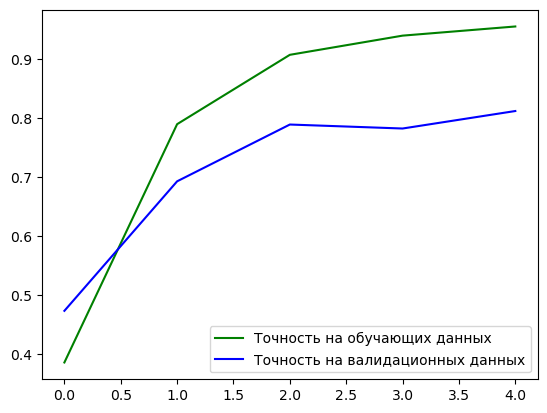

In [19]:
plt.plot(history.history['accuracy'],color='green') 
plt.plot(history.history['val_accuracy'],color='blue') 
plt.legend(['Точность на обучающих данных', 'Точность на валидационных данных'], loc='lower right')

Тестируем

In [16]:
label_df = pd.read_csv("Downloads/DATASET/test_labels.csv")
labels = np.array(label_df.label)
pred_arr = model.predict(test_ds)
predictions = np.zeros((number_of_test))
for i,pred in enumerate(pred_arr):
    predictions[i] = np.argmax(pred)

count = 0
for i in range(number_of_test):
    if predictions[i]== labels[i]:
        count+=1
        
test_acc = count/number_of_test
print("Accuracy: ",test_acc)

395/395 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step
Accuracy:  0.8768012668250198


"Наглядное" распознавание

Text(10, -5, 'Тестовое изображение')

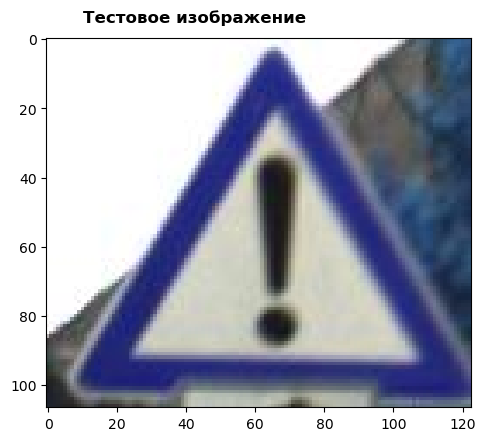

In [20]:
image_path = "Downloads/DATASET/TEST/TEST/00006.jpg"
plt.imshow(cv2.imread(image_path))
plt.text(10, -5, 'Тестовое изображение', fontsize=12, color='black', fontweight='bold')  

In [21]:
img = image.load_img(image_path, target_size=(64, 64))  # Загрузка изображения и изменение размера до (64, 64)
img_array = image.img_to_array(img)  # Преобразование изображения в массив NumPy
img_array = np.expand_dims(img_array, axis=0) 
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)  # Находим индекс класса с максимальной вероятностью
predicted_class_index

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


18

Text(10, -5, 'Изображение предсказанного класса')

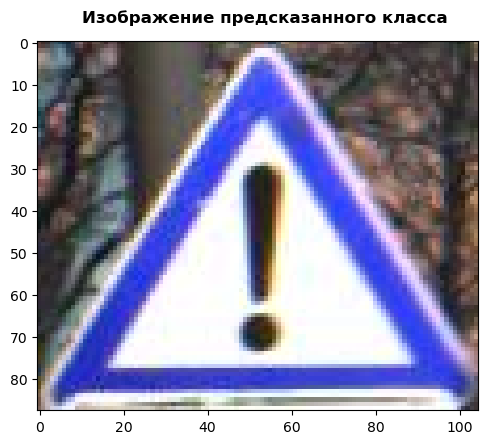

In [22]:
true_image = "Downloads/DATASET/TRAIN"
folder_number = str(predicted_class_index)
number='0'*(5-len(folder_number))+folder_number
true_image = true_image+'/'+(number)+'/'+number+'_'+'00029.jpg'
plt.imshow(cv2.imread(true_image))
plt.text(10, -5, 'Изображение предсказанного класса', fontsize=12, color='black', fontweight='bold')  